In [250]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#test

In [251]:
listings = pd.read_csv("/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/2_Semester/ML/Assignments/Assignment_1/listings.csv")
reviews = pd.read_csv("/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/2_Semester/ML/Assignments/Assignment_1/reviews.csv")

listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2900.0,5,57,2022-08-09,0.46,1,356,0,NaN
1,26473,Townhouse in Copenhagen · ★4.55 · 6 bedrooms ·...,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3350.0,3,341,2023-12-04,2.12,1,74,37,NaN
2,29118,Rental unit in Copenhagen · ★4.85 · 1 bedroom ...,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,1000.0,7,26,2023-07-18,0.16,1,0,1,NaN
3,318437,Rental unit in Copenhagen · ★4.86 · 1 bedroom ...,1634152,Ditti,NaN,Nrrebro,55.692680,12.554860,Private room,NaN,3,63,2019-09-27,0.63,1,0,0,NaN
4,31094,Condo in Copenhagen · ★4.88 · 4 bedrooms · 2 b...,129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,NaN,3,19,2022-08-22,0.12,1,0,0,NaN


In [252]:
reviews.head()

,listing_id,date
0,26057,2013-12-02
1,26057,2013-12-28
2,26057,2014-01-03
3,26057,2014-07-13
4,26057,2014-08-01


# 1.1 EDA

In [253]:
print(listings.shape)
print(listings.isnull().sum(axis = 0))

print(reviews.shape)
print(reviews.isnull().sum(axis = 0))

(18545, 18)
id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               18545
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              6349
minimum_nights                        0
number_of_reviews                     0
last_review                        2401
reviews_per_month                  2401
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           18545
dtype: int64
(332015, 2)
listing_id    0
date          0
dtype: int64


In [254]:
#drop neighbourhood group and license
listings.drop(['neighbourhood_group','license'], axis=1, inplace=True)

In [255]:
listings.dropna(inplace=True)
print(listings.shape)
print(listings.isnull().sum(axis = 0))

print(reviews.shape)
print(reviews.isnull().sum(axis = 0))

(10543, 16)
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64
(332015, 2)
listing_id    0
date          0
dtype: int64


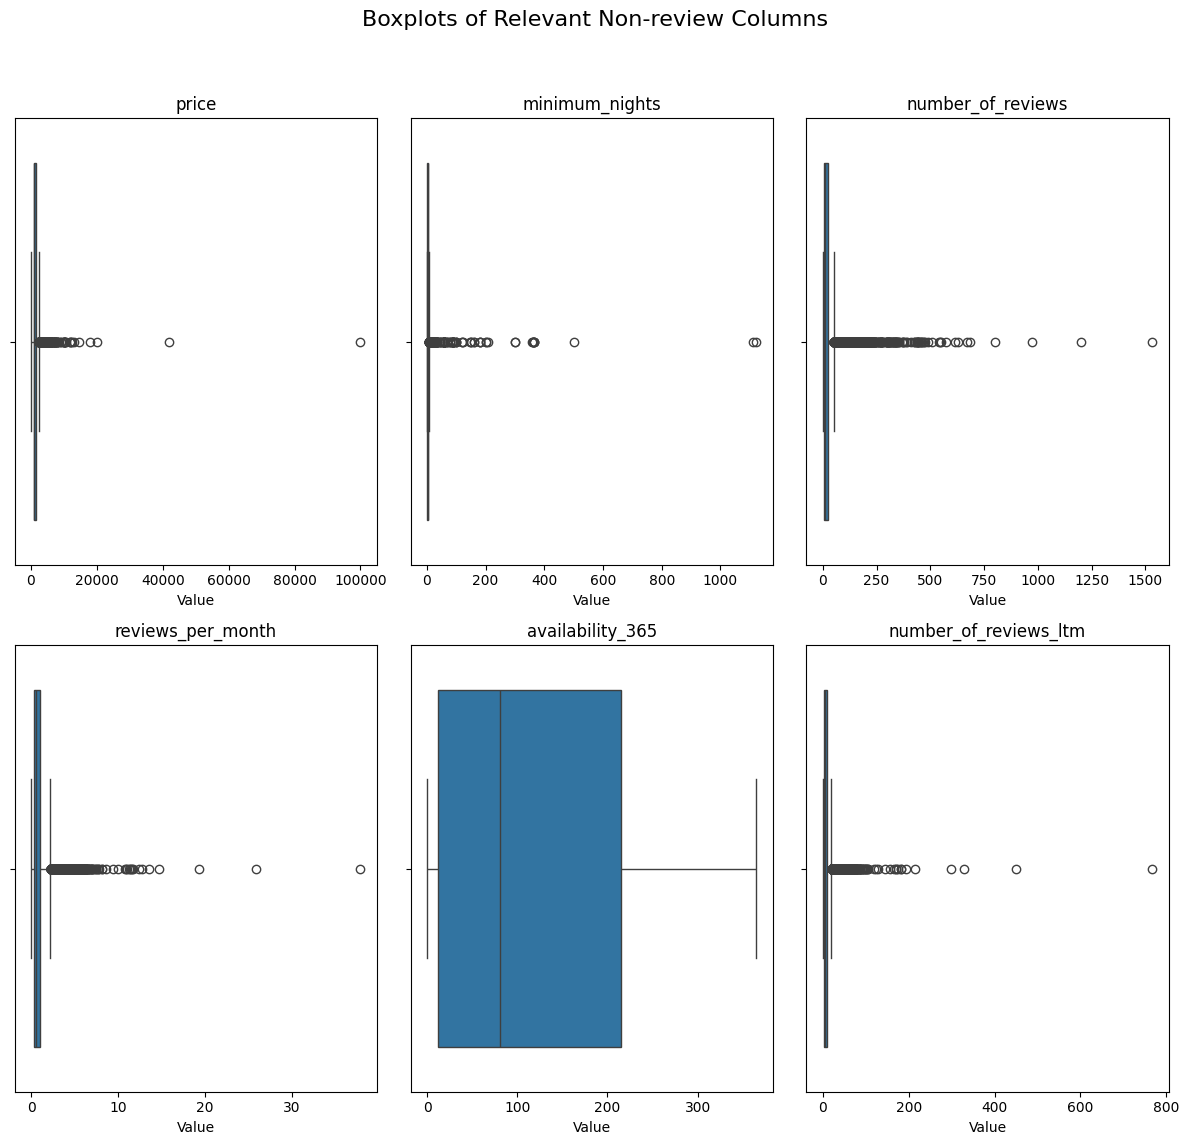

In [256]:
# Plotting a variety of boxplots to visualize the distribution of numerical columns
# List of columns to plot
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']

# Setting up subplots with square dimensions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
fig.suptitle('Boxplots of Relevant Non-review Columns', fontsize=16)

# Flatten the 2D array of axes to make indexing easier
axes = axes.flatten()

# Loop through columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=listings[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

<Axes: xlabel='price', ylabel='Count'>

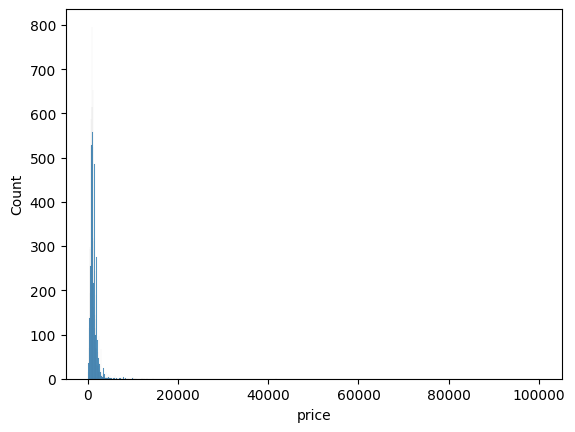

In [257]:
#histogram of price
sns.histplot(listings['price'],bins='auto')


<Axes: xlabel='reviews_per_month', ylabel='price'>

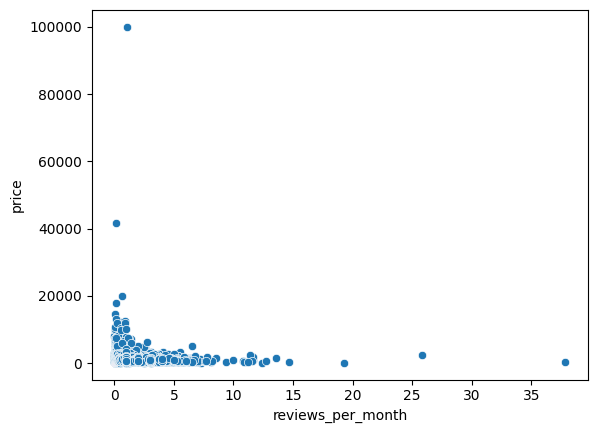

In [258]:
sns.scatterplot(data=listings, x="reviews_per_month", y="price")

In [259]:
## remove outliers in price with IQR method
def remove_outliers_IQR(listings, column_name):
    q1 = listings[column_name].quantile(0.25)
    q3 = listings[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    listings_flt = listings[(listings[column_name] >= lower_bound) & (listings[column_name] <= upper_bound)]

    return listings_flt

listings = remove_outliers_IQR(listings, 'price')
listings = remove_outliers_IQR(listings, 'reviews_per_month')


# 1.2 Clustering

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Text(0, 0.5, 'price')

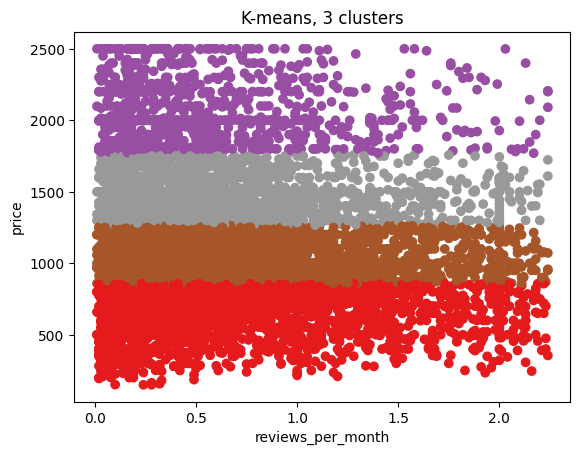

In [260]:
from sklearn.cluster import KMeans

#k-means clustering with 3 clusters.
X = listings[["reviews_per_month", "price"]]
km = KMeans(n_clusters = 4, random_state = 1)
km.fit(X)

col1 = listings.reviews_per_month
col2 = listings.price

labels = km.labels_

#plot cluster
plt.scatter(col1,col2, c = labels, cmap = 'Set1')
plt.title("K-means, {} clusters".format(3))
plt.xlabel(col1.name)
plt.ylabel(col2.name)

# 2.1 PCA

Apply PCA on Olivetti faces dataset, while preserving 99% of the variance. Then compute the reconstruction error for each image.


In [261]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

To preserve 99% of the variance, we need: 260
Total variance explained: 0.9900079369544983
Mean reconstruction error: 0.009992055594921112


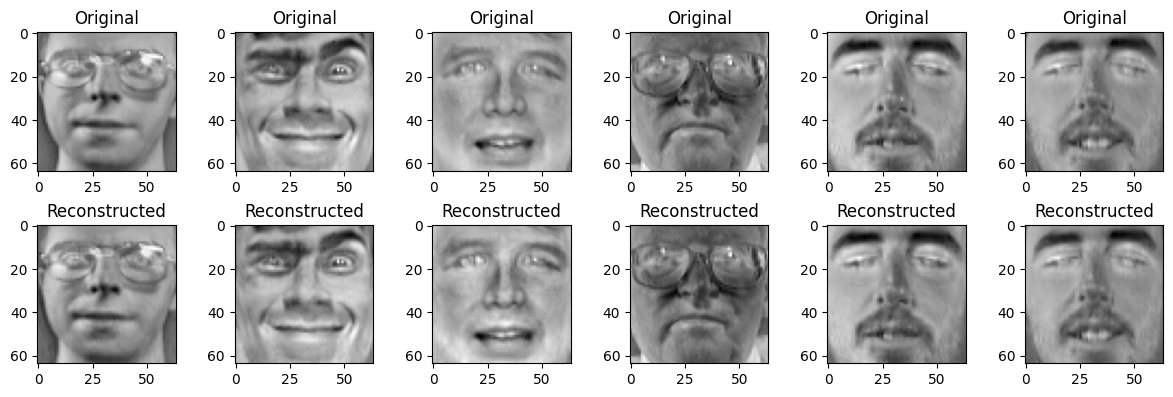

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


#reshape the faces data
faces_data_reshaped = faces.data.reshape((faces.data.shape[0], -1))

####DATA NEEDS TO BE NORMAILIZED BEFORE PCA
# Normalize the data
scaler = StandardScaler()
faces_data_reshaped = scaler.fit_transform(faces_data_reshaped)


#apply PCA to preserve 99% of the variance
pca = PCA(n_components=0.99)
faces_data_pca = pca.fit_transform(faces_data_reshaped)

#number of principal components to preserve 99% of the variance
n_components = pca.n_components_

#reconstruct the images using the selected number of components
faces_reconstructed = pca.inverse_transform(faces_data_pca)

#computes the mean squared error (MSE) between each original flattened face image and its reconstructed counterpart
#provides a measure of how well the reduced-dimensional representation captures the essential information in the data
reconstruction_errors = [mean_squared_error(faces_data_reshaped[i], faces_reconstructed[i]) for i in range(len(faces_data_reshaped))]

#display the results
print(f"To preserve 99% of the variance, we need: {n_components}")
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_)}")
print(f"Mean reconstruction error: {np.mean(reconstruction_errors)}")

#plot some original and reconstructed images
#n_images_to_display = 6

#create list to store recreated after pca pictures
original_images = []
pca_rec_images = []

#choose a few images to apply transformations
num_images = 6
selected_indices = np.random.choice(faces_data_reshaped.shape[0], num_images, replace=False)

plt.figure(figsize=(2 * num_images, 4))
for i, index in enumerate(selected_indices):
    # Original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(faces_data_reshaped[index].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title('Original')   
    original_images.append(faces_data_reshaped[index])


    # Reconstructed image (assuming you have faces_reconstructed available)
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(faces_reconstructed[index].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title('Reconstructed')
    pca_rec_images.append(faces_reconstructed[index])

plt.tight_layout()  # Ensure proper spacing between the plots
plt.show()

# 2.2 Reconstructing in presence og noise

Next, take some of the images you built using the PCA (previous step) and modify/add some noise to some of the images using techniques such as rotate, flip, and darken (use libraries such as scikit-image [1]) and look at their reconstruction error. You should also notice how much larger the reconstruction error is.


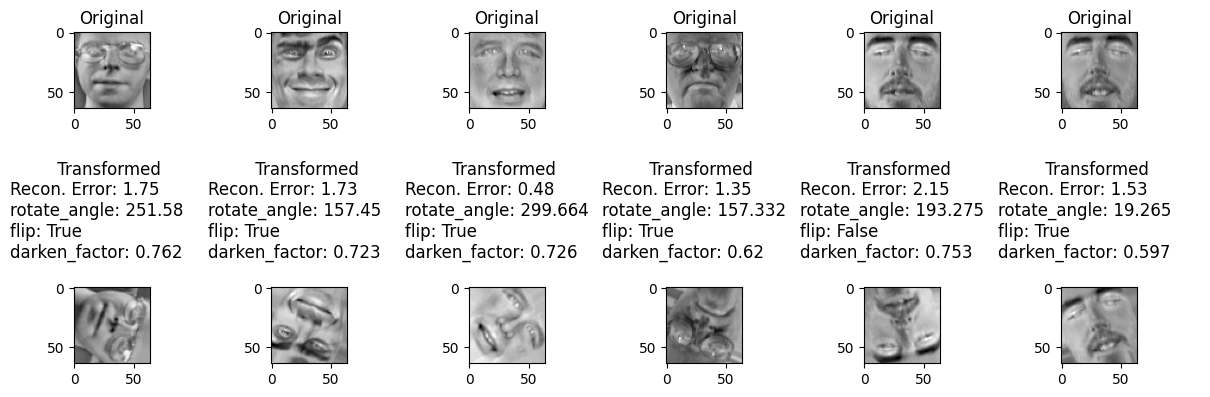

In [263]:
import random

# Function to apply various transformations to images
def apply_random_transformations(image):
    # Randomly choose transformations
    rotate_angle = random.uniform(0, 360)  # Random rotation angle between 0 and 360 degrees
    flip = random.choice([True, False])   # Randomly decide whether to flip or not
    darken_factor = random.uniform(0.5, 1.5)  # Random darkening factor between 0.5 and 1.5

    # Apply transformations
    rotated_image = transform.rotate(image.reshape(faces.images.shape[1], faces.images.shape[2]), angle=rotate_angle, mode='edge').flatten()
    flipped_image = np.fliplr(image.reshape(faces.images.shape[1], faces.images.shape[2])).flatten() if flip else image
    darkened_image = util.img_as_float(image) * darken_factor

    # Keep track of applied transformations
    transformations_applied = {
        'rotate_angle': round(rotate_angle,3),
        'flip': flip,
        'darken_factor': round(darken_factor,3)
    }

    return rotated_image, transformations_applied

# Lists to store the images and transformations applied
applied_transformations = []
transformed_images = []

#define plot
plt.figure(figsize=(2 * num_images, 4))

# Display original images, apply random transformations, and calculate reconstruction error
for i, index in enumerate(selected_indices):
    original_image = original_images[i]
    #flattened_original = original_image.flatten()

    # Apply random transformations
    transformed_image, transformations_applied = apply_random_transformations(original_image)
    transformed_images.append(transformed_image)

    # Append the transformed image to the list
    applied_transformations.append(transformations_applied)

    # Calculate and display reconstruction error
    error = mean_squared_error(original_image, transformed_image)
    plt.subplot(2, num_images, i + 1)
    plt.imshow(original_image.reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title('Original')

    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(transformed_image.reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    
    # Construct the title with separate lines for "Transformed" and the rest
    title_string_transformed = 'Transformed'
    title_string_details = f'Recon. Error: {error:.2f}\n'
    for key, value in transformations_applied.items():
        title_string_details += f'{key}: {value}\n'
    plt.title(f"\n{title_string_transformed.center(30)}\n{title_string_details}", multialignment='left')


plt.tight_layout()  # Ensure proper spacing between the plots
plt.show()


# 2.3

Finally, plot all the three respective reconstructed images side-by-side (original image, image after PCA, image after PCA + noise) and compare the results.

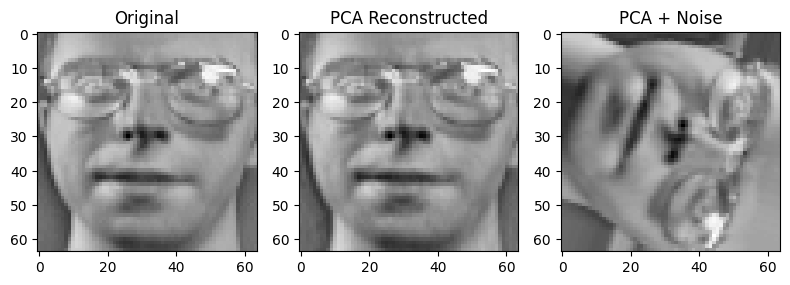

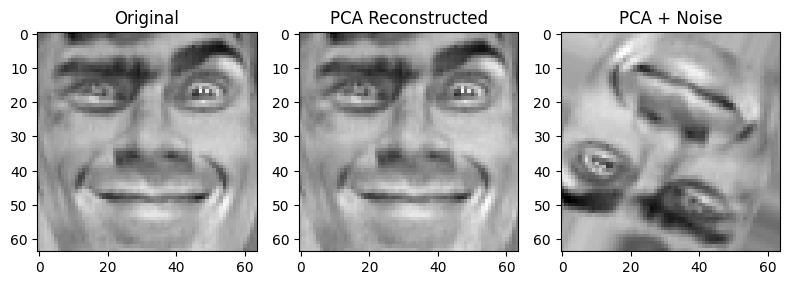

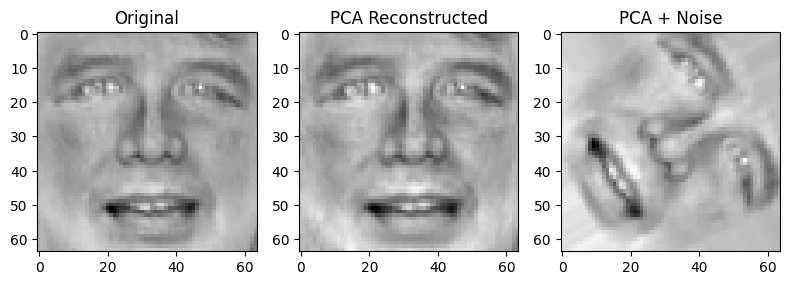

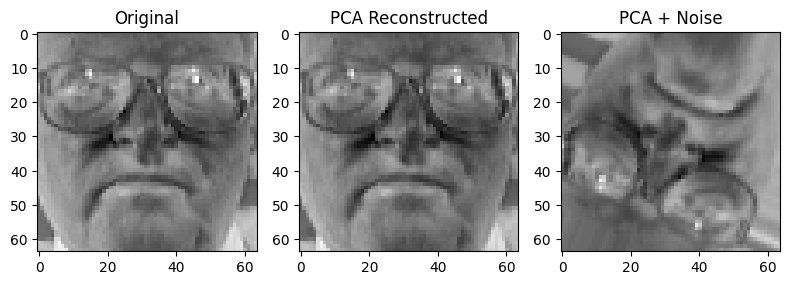

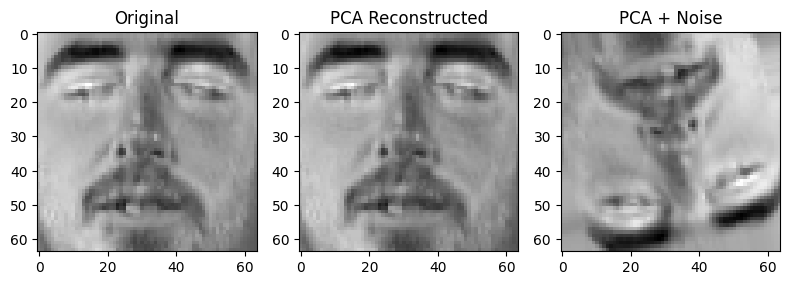

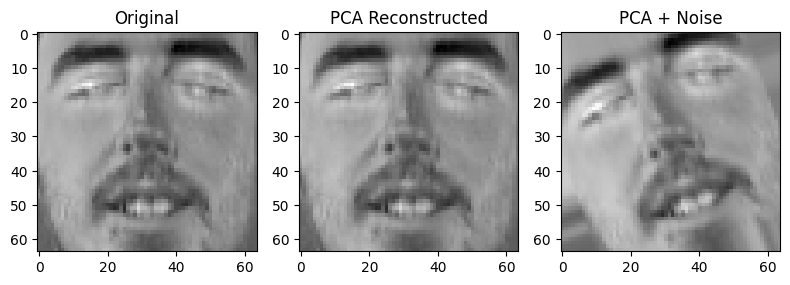

In [264]:
for original_image, pca_rec_image , transformed_image in zip(original_images, pca_rec_images ,transformed_images):
    plt.figure(figsize=(8, 3))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_image.reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.imshow(pca_rec_image.reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title(f'PCA Reconstructed')    

    plt.subplot(1, 3, 3)
    plt.imshow(transformed_image.reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title(f'PCA + Noise')
    
    plt.tight_layout()
    
    plt.show()